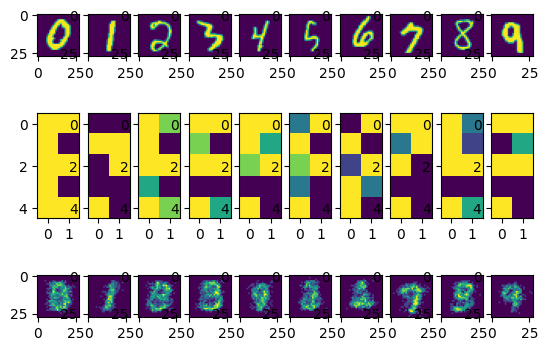

In [8]:
import torch
import numpy as np
import pandas as pd
import os
from DBN import DBN
from load_dataset import MNIST
import cv2
from PIL import Image
from matplotlib import pyplot as plt

def image_beautifier(names, final_name):

    image_names = sorted(names)
    images = [Image.open(x) for x in names]
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)
    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset,0))
        x_offset += im.size[0]

    new_im.save(final_name)
    img = cv2.imread(final_name)
    img = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2))
    cv2.imwrite(final_name, img)

def gen_displayable_images():
    suffix = '_image.jpg'
    for n in range(10):
        prefix = './images_DBN/digitwise/'+str(n)+'_'
        names = ['original', 'hidden', 'reconstructed']
        names = [prefix+name+suffix for name in names]
        image_beautifier(names, './images_DBN/'+str(n)+'.jpg')
        
if __name__ == '__main__':
    mnist = MNIST()
    train_x, train_y, test_x, test_y = mnist.load_dataset()

    layers = [512, 128, 64, 10]
    dbn = DBN(train_x.shape[1], layers)
    dbn.layer_parameters = torch.load('mnist_trained_dbn.pt')
    f, axarr = plt.subplots(3, 10)
    z = 0
    
    for n in range(10):
        y = 0
        x = test_x[np.where(test_y==n)[0][0]]
        x = x.unsqueeze(0)
        gen_image, hidden_image = dbn.reconstructor(x)
        gen_image = gen_image.numpy()
        hidden_image = hidden_image.numpy()
        image = x.numpy()
        
        image = mnist.inv_transform_normalizer(image)[0]
        hidden_image = (hidden_image*255)[0]
        gen_image = mnist.inv_transform_normalizer(gen_image)[0]

        image = np.reshape(image, (28, 28))
        hidden_image = np.reshape(hidden_image, (5, 2))
        gen_image = np.reshape(gen_image, (28, 28))

        image = image.astype(int)
        hidden_image = hidden_image.astype(int)
        gen_image = gen_image.astype(int)
        
        prefix = './images_DBN/digitwise/'+str(n)+'_'
        suffix = '_image.jpg'
        
        axarr[y, z].imshow(image)
        axarr[y+1, z].imshow(hidden_image)
        axarr[y+2, z].imshow(gen_image)
        
        z = z + 1

    gen_displayable_images()